In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import load_npz


In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [11]:
X = load_npz('./data/X.npz')
y = np.loadtxt('./data/y.csv', dtype=int, delimiter=',')

In [12]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5186979 stored elements and shape (39100, 7000)>

In [13]:
y

array([1, 0, 1, ..., 1, 0, 1])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [15]:
print(f"X shape: {X_train.shape}, {X_test.shape}")
print(f"Target shape: {y_train.shape}, {y_test.shape}")

X shape: (31280, 7000), (7820, 7000)
Target shape: (31280,), (7820,)


## Logistic Regression

In [16]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
y_pred = logreg.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))


Accuracy: 0.9861892583120204
Precision: 0.9806841982778682
Recall: 0.9941023826374145
F1-Score: 0.9873477038425492

Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      3581
        Real       0.98      0.99      0.99      4239

    accuracy                           0.99      7820
   macro avg       0.99      0.99      0.99      7820
weighted avg       0.99      0.99      0.99      7820



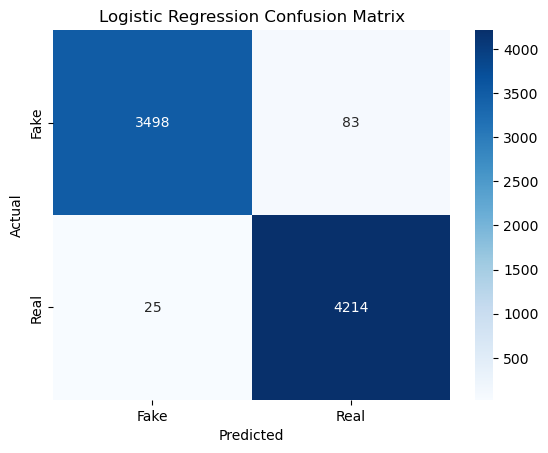

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## Linear SVM

In [20]:
svm = LinearSVC(random_state=42)
svm.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


In [21]:
y_pred_svm = svm.predict(X_test)


In [22]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Precision:", precision_score(y_test, y_pred_svm))
print("SVM Recall:", recall_score(y_test, y_pred_svm))
print("SVM F1-Score:", f1_score(y_test, y_pred_svm))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=["Fake", "Real"]))


SVM Accuracy: 0.992838874680307
SVM Precision: 0.9913084331688983
SVM Recall: 0.995517810804435
SVM F1-Score: 0.9934086629001884

SVM Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3581
        Real       0.99      1.00      0.99      4239

    accuracy                           0.99      7820
   macro avg       0.99      0.99      0.99      7820
weighted avg       0.99      0.99      0.99      7820



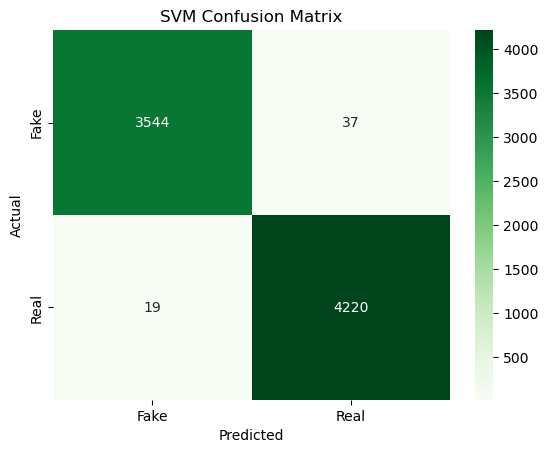

In [23]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Multinominal Navie Bayse

In [24]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [25]:
y_pred_nb = nb.predict(X_test)

In [26]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Precision:", precision_score(y_test, y_pred_nb))
print("Naive Bayes Recall:", recall_score(y_test, y_pred_nb))
print("Naive Bayes F1-Score:", f1_score(y_test, y_pred_nb))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=["Fake", "Real"]))


Naive Bayes Accuracy: 0.941304347826087
Naive Bayes Precision: 0.9468085106382979
Naive Bayes Recall: 0.9447983014861996
Naive Bayes F1-Score: 0.9458023379383634

Naive Bayes Classification Report:
              precision    recall  f1-score   support

        Fake       0.93      0.94      0.94      3581
        Real       0.95      0.94      0.95      4239

    accuracy                           0.94      7820
   macro avg       0.94      0.94      0.94      7820
weighted avg       0.94      0.94      0.94      7820



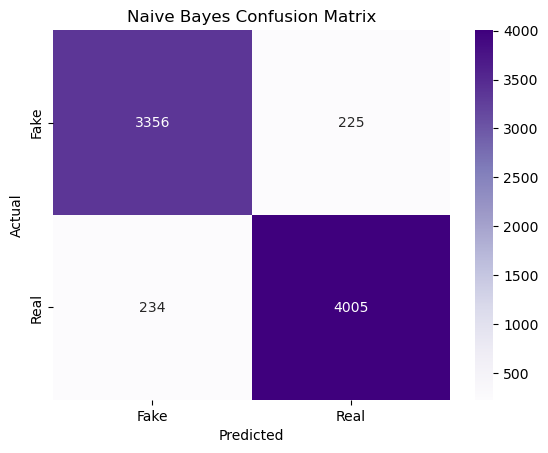

In [27]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Random Forest

In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Fake", "Real"]))


Random Forest Accuracy: 0.9907928388746803
Random Forest Precision: 0.9855511535772548
Random Forest Recall: 0.9976409530549658
Random Forest F1-Score: 0.9915592028135991

Random Forest Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      0.98      0.99      3581
        Real       0.99      1.00      0.99      4239

    accuracy                           0.99      7820
   macro avg       0.99      0.99      0.99      7820
weighted avg       0.99      0.99      0.99      7820



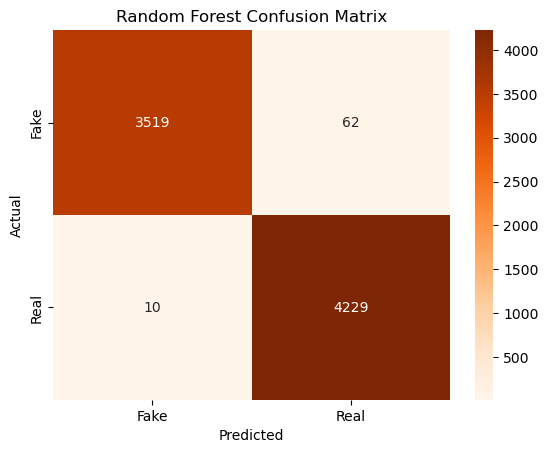

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Voting Classifier (Ensemble)

In [ ]:
svm_base = LinearSVC(random_state=42)
svm = CalibratedClassifierCV(svm_base)

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('svm', svm)
    ],
    voting='soft'
)

In [ ]:
voting_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [ ]:
y_pred_voting = voting_clf.predict(X_test)

NameError: name 'voting_clf' is not defined

In [ ]:
print("VotingClassifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Precision:", precision_score(y_test, y_pred_voting))
print("Recall:", recall_score(y_test, y_pred_voting))
print("F1-Score:", f1_score(y_test, y_pred_voting))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_voting, target_names=["Fake", "Real"]))

VotingClassifier Accuracy: 0.9918158567774936
Precision: 0.9899084721896269
Recall: 0.9950460014154282
F1-Score: 0.9924705882352941

Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3581
        Real       0.99      1.00      0.99      4239

    accuracy                           0.99      7820
   macro avg       0.99      0.99      0.99      7820
weighted avg       0.99      0.99      0.99      7820



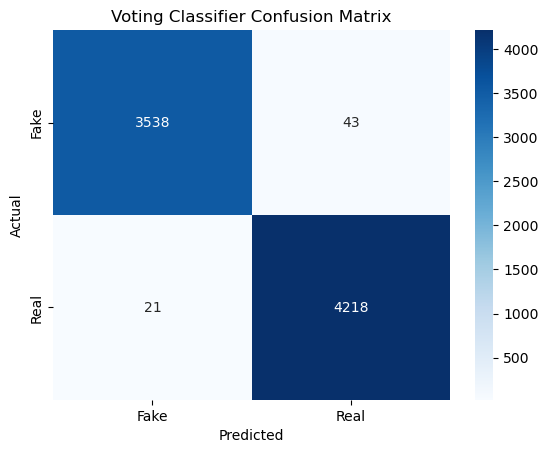

In [ ]:
cm = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.title("Voting Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Exporting

In [ ]:
import joblib
import os 

os.makedirs('models', exist_ok=True)
joblib.dump(voting_clf, 'models/verifai_voting_model.pkl')

['models/verifai_voting_model.pkl']

In [ ]:
# Load model and vectorizer
loaded_model = joblib.load('models/verifai_voting_model.pkl')
loaded_vectorizer = joblib.load('models/verifai_vectorizer.pkl')

# Predict on new text
text = ["""Astronomers detect most massive black hole collision to date  
A collision observed between two black holes, each more massive than a hundred suns, is the largest merger of its kind ever recorded, according to new research.

A team of astronomers discovered the event, dubbed GW231123, when the Laser Interferometer Gravitational-Wave Observatory (LIGO) — a pair of identical instruments located in Livingston, Louisiana, and Hanford, Washington — detected faint ripples in space-time produced by two black holes slamming into each other. Physicists call such ripples gravitational waves.

Gravitational waves were predicted by Albert Einstein in 1915 as part of his theory of relativity, but he thought they were too weak to ever be discovered by human technology. In 2016, however, LIGO detected them for the very first time when black holes collided, proving Einstein right (once again). The following year, three scientists received awards for their key contributions to the development of what has been colloquially called a “black hole telescope.”

Since the first detection of gravitational waves, LIGO and its sister instruments — Virgo in Italy, and KAGRA in Japan — have picked up signs of about 300 black hole mergers. “These amazing detectors are really the most sensitive measuring instruments that human beings have ever built,” said Mark Hannam, head of Gravity Exploration Institute at Cardiff University in the UK and a member of the LIGO Scientific Collaboration. “So, we’re observing the most violent and extreme events in the universe through the smallest measurements we can make.” GW231123, however, is exceptional among those 300 black hole mergers, and not just because it is the most massive of the collisions.

“The individual black holes are special because they lie in a range of masses where we do not expect them to be produced from dying stars,” said Charlie Hoy, a research fellow at the University of Plymouth in the UK who’s also a member of the LIGO Scientific Collaboration. “As if this wasn’t enough,” he continued, “the black holes are also likely spinning almost as fast as physically possible. GW231123 presents a real challenge to our understanding of black hole formation.”

A ‘mass gap’
Gravitational waves are the only way scientists can observe a collision in a binary system in which two black holes orbit each other. “Before we could observe them with gravitational waves, there was even a question of whether black hole binaries even existed,” Hannam said. “Black holes don’t give off any light or any other electromagnetic radiation, so any kind of regular telescope is unable to observe them.”

According to Einstein’s theory of general relativity, gravity is a stretching of space and time, and it forces objects to move through curved space. When objects move very rapidly, like spinning black holes, the curved space forms ripples that spread outward like waves.

These gravitational waves are “ridiculously weak,” according to Hannam, and there are limitations to the information they can provide. For example, there’s uncertainty about the distance of GW231123 from Earth; it could be up to 12 billion light-years away. Hannam is more confident about the mass of the two black holes, which are believed to be approximately 100 and 140 times the mass of the sun. """]
X_new = loaded_vectorizer.transform(text)
pred = loaded_model.predict(X_new)

print("Prediction:", "Real" if pred[0] == 1 else "Fake")

Prediction: Fake
